# Assignment 3 – CSCI 450 | Malek Elaghel

## Imports.

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In this assignment, I combined questions 1 and 2 as that seemed more intuitive/easier overall.

## Question 1.

### Write a function that takes a color image and an integer ‘n’ as input and returns a numpy array of size nx4 (n rows and 4 columns). This array should contain corner coordinates of n randomly generated boxes defined on the image in the order [r1, c1, r2, c2]. One such box is shown in the figure. Values r and c represent row and column numbers. Also, h>r2>r1, w>c2>c1 where h and w are the height and width of the image. Demonstrate the function on an image. The purpose of this exercise is to make sure you feel comfortable handling images, so write the code yourself, don’t use a library function to do this whole work even if you find one.

## Question 2.

### Write a function that takes a color image and four integers in the order r1, c1, r2, c2 and returns the image with a red rectangle drawn over it between these coordinates (Hint: setting the red pixel component to 255 and green and blue to 0 turns the pixel red). The thickness of the lines forming the rectangle is up to you but just one pixel thick would be enough. Demonstrate the function on an image. The purpose of this exercise is to make sure you feel comfortable handling images, so write the code yourself, don’t use a library function to do this whole work even if you find one.

[[263 290 418 779]
 [328 314 484 483]
 [ 58 946 530 974]
 [564 606 598 980]
 [545 211 580 885]]


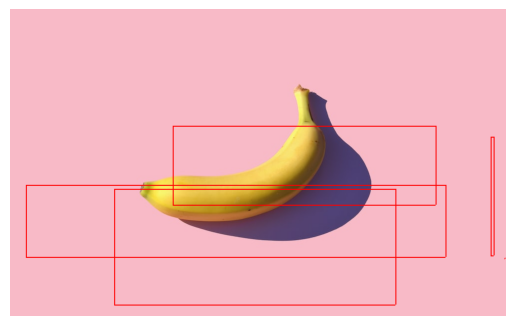

[[362 210 595 777]
 [354  32 499 878]
 [235 328 394 858]
 [257 969 496 975]
 [501 997 502 998]]
Box 1: [362 210 595 777]
Box 2: [354  32 499 878]
Box 3: [235 328 394 858]
Box 4: [257 969 496 975]
Box 5: [501 997 502 998]


In [6]:
# Generate random boxes on an image and display the image with boxes using matplotlib
def generate_random_boxes(image_or_path: str | np.ndarray, n: int) -> np.ndarray:
    if isinstance(image_or_path, str):
        # Load the image from a file path using skimage
        # RBG image (height, width, channels), unlike CV2 which is BGR.
        image = io.imread(image_or_path)
    elif isinstance(image_or_path, np.ndarray):
        # Use the provided image directly
        image = image_or_path
    # Do I need this else statement? I think it is not necessary.
    else:
        raise ValueError(
            "Invalid input. The first parameter should be a file path (string) or an image (NumPy array).")

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Initialize an empty array to store box coordinates
    boxes = np.empty((n, 4), dtype=int)

    # Generate all random coordinates at once
    # np.random.randint is inclusive of low and exclusive of high.
    # Subtracting thickness may cause the box to be out of bounds: low >= high.
    r1_values = np.random.randint(0, height - 2, n)
    c1_values = np.random.randint(0, width - 2, n)
    r2_values = np.random.randint(r1_values + 1, height, n)
    c2_values = np.random.randint(c1_values + 1, width, n)
    # Extreme cases: r1 = height - 2, c1 = width - 2, r2 = height - 1, c2 = width - 1. All are valid.

    for i in range(n):
        # Get the coordinates for the i-th box
        r1, c1, r2, c2 = r1_values[i], c1_values[i], r2_values[i], c2_values[i]
        boxes[i] = [r1, c1, r2, c2]
        # Draw the box on the image for visualization
        image = draw_box(image, r1, c1, r2, c2, color, thickness)

    # Convert the BGR image to RGB for matplotlib
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with boxes using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return boxes

# Draw a box on an image using NumPy array slicing


def draw_box(image: np.ndarray, r1: int, c1: int, r2: int, c2: int, color: tuple, thickness: int) -> np.ndarray:
    # Manually draw a box on the image
    image[r1:r1+thickness, c1:c2, ...] = color  # Top edge
    image[r2:r2+thickness, c1:c2, ...] = color  # Bottom edge
    image[r1:r2, c1:c1+thickness, ...] = color  # Left edge
    image[r1:r2, c2:c2+thickness, ...] = color  # Right edge
    return image


# Example usage.
image = 'testpic.jpeg'
# I was not sure if I should make color and thickness parameters of the main function or not.
# I just made them global. Maybe I should make them parameters in future use.
color = (255, 0, 0)  # Red
thickness = 2
n = 5  # Number of random boxes to generate; global variable.
picture_with_boxes = generate_random_boxes(image, n)
# Print the coordinates of the boxes
for i, box in enumerate(picture_with_boxes, start=1):
    print(f'Box {i}: {box}')